In [1]:
pip install pandas-datareader

     |████████████████████████████████| 107 kB 5.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [128]:
import numpy as np
import pandas as pd
from pandas_datareader import data, wb
import datetime

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [133]:
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [100]:
df=pd.read_csv('911.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


In [101]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [17]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [18]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [26]:
df['title'].nunique()

110

In [102]:
x=df['title']

In [103]:
df['reasons']=df['title'].apply(lambda x: x.split(':')[0])

In [104]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS


In [34]:
df['reasons'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reasons, dtype: int64

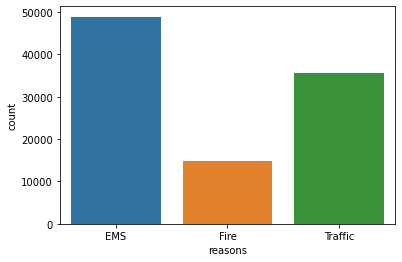

In [40]:
#plt.hist(df['reasons'])
sns.countplot(x=df['reasons'])

In [49]:
type(df['timeStamp'].iloc[0])

str

In [105]:
df['timeStamp']=pd.to_datetime(df['timeStamp'])
type(df['timeStamp'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [60]:
a=df['timeStamp'].iloc[0]
a.dayofweek #hour, month

3

In [116]:
x=df['timeStamp']
df['hour']=df['timeStamp'].apply(lambda x: x.hour)
df['month']=df['timeStamp'].apply(lambda x: x.month)
df['day of week']=df['timeStamp'].apply(lambda x: x.dayofweek)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,3
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,3
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,3
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,3
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,3


In [83]:
x=[range(7)]
y=['Sun','Mon','Tue','Wed','Thurs','Fri','Sat']
a=map(lambda x:y,x)
list(a)

[['Sun', 'Mon', 'Tue', 'Wed', 'Thurs', 'Fri', 'Sat']]

In [117]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
x=[0,1,2,3,4,5,6]
a=map(lambda x:x,dmap.values())

In [118]:
df['day of week']=df['day of week'].map(dmap)
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day of week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu


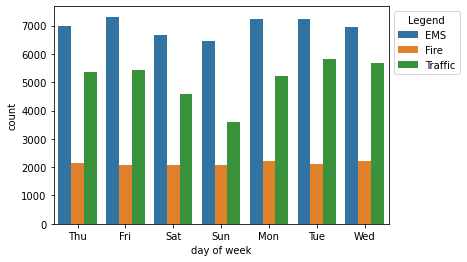

In [121]:
sns.countplot(df['day of week'],hue=df['reasons'])
plt.legend(title='Legend', bbox_to_anchor=(1.0, 1), loc='upper left')

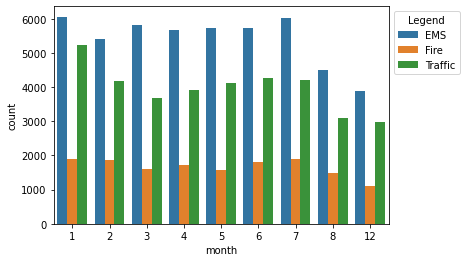

In [122]:
sns.countplot(df['month'],hue=df['reasons'])
plt.legend(title='Legend', bbox_to_anchor=(1.0, 1), loc='upper left')

In [136]:
byMonth=df.groupby('month').count()
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,day of week
month,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423


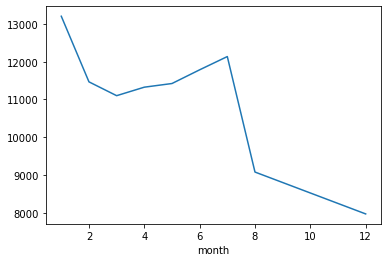

In [143]:
byMonth['lat'].plot()

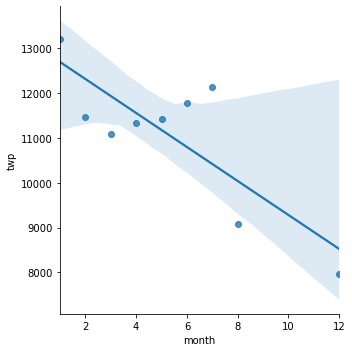

In [147]:
sns.lmplot(x='month',y='twp',data=byMonth.reset_index())

In [149]:
x=df['timeStamp']
df['date']=df['timeStamp'].apply(lambda x: x.date())
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day of week,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,12,Thu,2015-12-10


In [155]:
byDate=df.groupby('date').count()
byDate.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reasons,hour,month,day of week
date,,,,,,,,,,,,,
2015-12-10,115,115,115,100,115,115,115,113,115,115,115,115,115
2015-12-11,396,396,396,333,396,396,395,391,396,396,396,396,396
2015-12-12,403,403,403,333,403,403,403,401,403,403,403,403,403
2015-12-13,319,319,319,280,319,319,319,317,319,319,319,319,319
2015-12-14,447,447,447,387,447,447,446,445,447,447,447,447,447


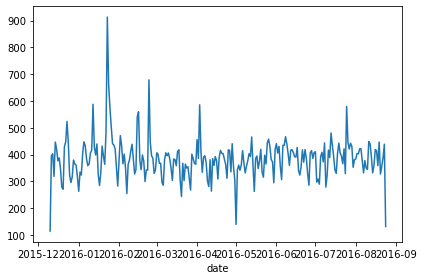

In [161]:
byDate['lat'].plot()
plt.tight_layout()

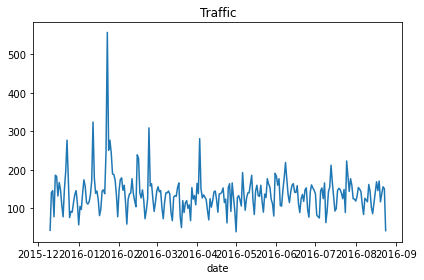

In [165]:
df[df['reasons']=='Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

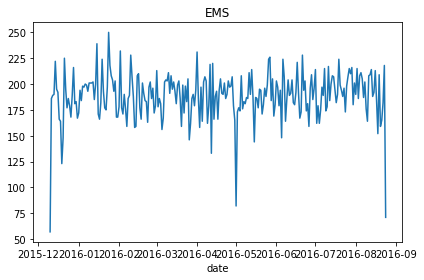

In [166]:
df[df['reasons']=='EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

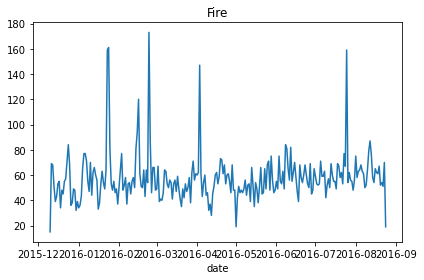

In [167]:
df[df['reasons']=='Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

In [174]:
h=df.groupby(by=['day of week','hour']).count()['reasons'].unstack()
h

hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
day of week,,,,,,,,,,,,,,,,,,,,,
Fri,275,235,191,175,201,194,372,598,742,752,...,932,980,1039,980,820,696,667,559,514,474
Mon,282,221,201,194,204,267,397,653,819,786,...,869,913,989,997,885,746,613,497,472,325
Sat,375,301,263,260,224,231,257,391,459,640,...,789,796,848,757,778,696,628,572,506,467
Sun,383,306,286,268,242,240,300,402,483,620,...,684,691,663,714,670,655,537,461,415,330
Thu,278,202,233,159,182,203,362,570,777,828,...,876,969,935,1013,810,698,617,553,424,354
Tue,269,240,186,170,209,239,415,655,889,880,...,943,938,1026,1019,905,731,647,571,462,274
Wed,250,216,189,209,156,255,410,701,875,808,...,904,867,990,1037,894,686,668,575,490,335


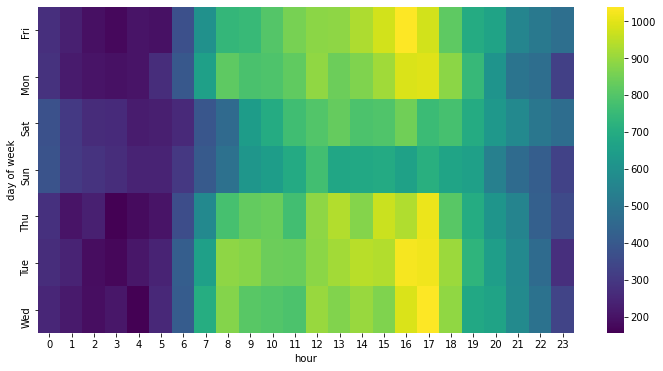

In [180]:
plt.figure(figsize=(12,6))
sns.heatmap(h,cmap='viridis')

In [182]:
m=df.groupby(by=['month','day of week']).count()['reasons'].unstack()
m

day of week,Fri,Mon,Sat,Sun,Thu,Tue,Wed
month,,,,,,,
1,1970,1727,2291,1960,1584,1973,1700
2,1581,1964,1441,1229,1596,1753,1903
3,1525,1535,1266,1102,1900,1884,1889
4,1958,1598,1734,1488,1601,1430,1517
5,1730,1779,1444,1424,1590,1918,1538
6,1649,1617,1388,1333,2065,1676,2058
7,2045,1692,1695,1672,1646,1670,1717
8,1310,1511,1099,1021,1230,1612,1295
12,1065,1257,978,907,1266,1234,1262


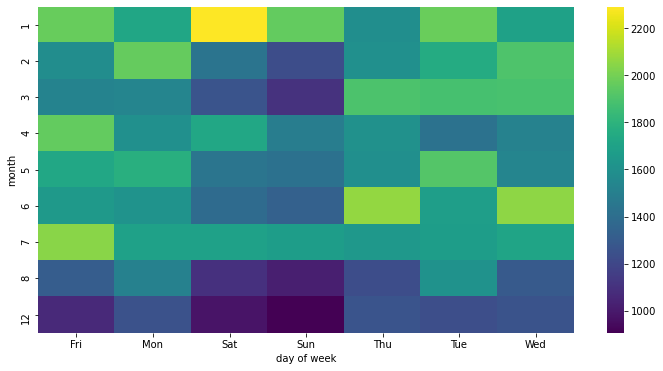

In [183]:
plt.figure(figsize=(12,6))
sns.heatmap(m,cmap='viridis')

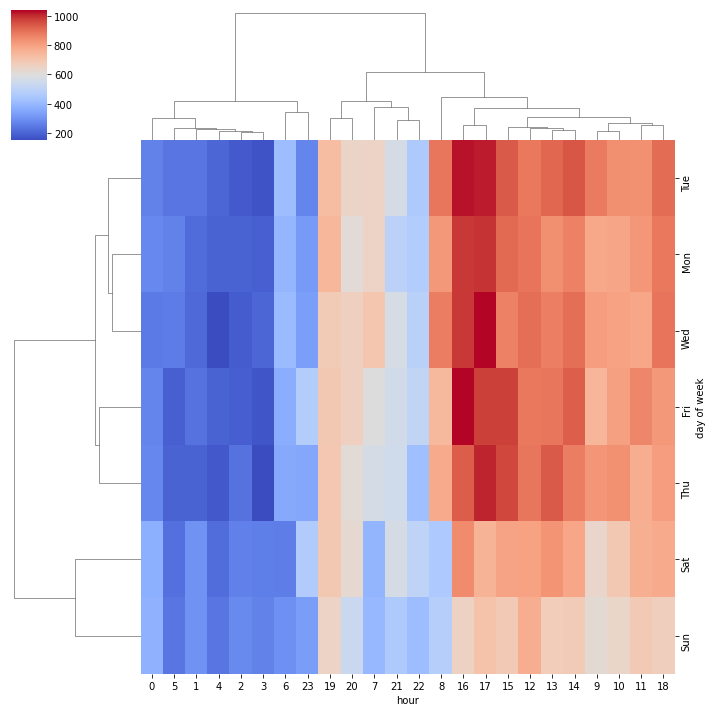

In [186]:
sns.clustermap(h,cmap='coolwarm')

In [8]:
df=pd.read_pickle('all_banks')
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2517 entries, 2006-01-03 to 2015-12-31
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   (BAC, Open)    2517 non-null   float64
 1   (BAC, High)    2517 non-null   float64
 2   (BAC, Low)     2517 non-null   float64
 3   (BAC, Close)   2517 non-null   float64
 4   (BAC, Volume)  2517 non-null   int64  
 5   (C, Open)      2517 non-null   float64
 6   (C, High)      2517 non-null   float64
 7   (C, Low)       2517 non-null   float64
 8   (C, Close)     2517 non-null   float64
 9   (C, Volume)    2517 non-null   int64  
 10  (GS, Open)     2517 non-null   float64
 11  (GS, High)     2517 non-null   float64
 12  (GS, Low)      2517 non-null   float64
 13  (GS, Close)    2517 non-null   float64
 14  (GS, Volume)   2517 non-null   int64  
 15  (JPM, Open)    2517 non-null   float64
 16  (JPM, High)    2517 non-null   float64
 17  (JPM, Low)     2517 non-null   flo

In [30]:
df.head()

Bank Ticker    BAC                       ...    WFC                        
Stock Info    Open   High    Low  Close  ...   High    Low  Close    Volume
Date                                     ...                               
2006-01-03   46.92  47.18  46.15  47.08  ...  31.98  31.20  31.90  11016400
2006-01-04   47.00  47.24  46.45  46.58  ...  31.82  31.36  31.53  10871000
2006-01-05   46.58  46.83  46.32  46.64  ...  31.56  31.31  31.50  10158000
2006-01-06   46.80  46.91  46.35  46.57  ...  31.78  31.38  31.68   8403800
2006-01-09   46.72  46.97  46.36  46.60  ...  31.82  31.56  31.68   5619600

[5 rows x 30 columns]

In [63]:
start = datetime.datetime(2006, 1, 1)
end=datetime.datetime(2016, 1, 1)
BAC=data.DataReader('BAC','yahoo',start,end)
C=data.DataReader('C','yahoo',start,end)
GS=data.DataReader('GS','yahoo',start,end)
JPM=data.DataReader('JPM','yahoo',start,end)
WFC=data.DataReader('WFC','yahoo',start,end)
MS=data.DataReader('MS','yahoo',start,end)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.867344
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.892612
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.993786
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,37.031731
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.423725
...,...,...,...,...,...,...
2015-12-24,32.709999,32.439999,32.570000,32.480000,2798200.0,28.702150
2015-12-28,32.360001,31.950001,32.360001,32.169998,5420300.0,28.428209
2015-12-29,32.700001,32.330002,32.439999,32.549999,6388200.0,28.764009


In [65]:
MS

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2006-01-03,58.490002,56.740002,57.169998,58.310001,5377000.0,36.867344
2006-01-04,59.279999,58.349998,58.700001,58.349998,7977800.0,36.892612
2006-01-05,58.590000,58.020000,58.549999,58.509998,5778000.0,36.993786
2006-01-06,58.849998,58.049999,58.770000,58.570000,6889800.0,37.031731
2006-01-09,59.290001,58.619999,58.630001,59.189999,4144500.0,37.423725
...,...,...,...,...,...,...
2015-12-24,32.709999,32.439999,32.570000,32.480000,2798200.0,28.702150
2015-12-28,32.360001,31.950001,32.360001,32.169998,5420300.0,28.428209
2015-12-29,32.700001,32.330002,32.439999,32.549999,6388200.0,28.764009


In [62]:
MS1=df.unstack()
MS1=MS1.reset_index()
MS1=MS1[MS1['Bank Ticker']=='MS']
mask = (MS1['Date'] > start) & (MS1['Date'] <= end)
MS2=MS1[mask]
MS2
#MS3=MS2.groupby('Stock Info')
MS2.pivot_table(0,'Date','Stock Info')

Stock Info,Close,High,Low,Open,Volume
Date,,,,,
2006-01-03,58.31,58.49,56.74,57.17,5377000.0
2006-01-04,58.35,59.28,58.35,58.70,7977800.0
2006-01-05,58.51,58.59,58.02,58.55,5778000.0
2006-01-06,58.57,58.85,58.05,58.77,6889800.0
2006-01-09,59.19,59.29,58.62,58.63,4144500.0
...,...,...,...,...,...
2015-12-24,32.48,32.71,32.44,32.57,2798163.0
2015-12-28,32.17,32.36,31.95,32.36,5420280.0
2015-12-29,32.55,32.70,32.32,32.44,6388244.0


In [67]:
tickers=['BAC','C','GS','JPM','MS','WFC']
tickers

['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

In [74]:
bank_stocks=pd.concat([BAC,C,GS,JPM,MS,WFC],keys=tickers,axis=1)

In [76]:
bank_stocks.columns.names=['Bank Ticker','Stock Info']
bank_stocks.head()

Bank Ticker        BAC                        ...        WFC                       
Stock Info        High        Low       Open  ...      Close      Volume  Adj Close
Date                                          ...                                  
2006-01-03   47.180000  46.150002  46.919998  ...  31.900000  11016400.0  20.723480
2006-01-04   47.240002  46.450001  47.000000  ...  31.530001  10870000.0  20.483118
2006-01-05   46.830002  46.320000  46.580002  ...  31.495001  10158000.0  20.460379
2006-01-06   46.910000  46.349998  46.799999  ...  31.680000   8403800.0  20.580564
2006-01-09   46.970001  46.360001  46.720001  ...  31.674999   5619600.0  20.577309

[5 rows x 36 columns]

In [154]:
for t in tickers:
    print(t,df[t]['Close'].max())

BAC 54.9
C 564.1
GS 247.92
JPM 70.08
MS 89.3
WFC 58.52


In [155]:
df.xs(key='Close',axis=1,level='Stock Info').max()  #Column name, r or c, column level

Bank Ticker
BAC     54.90
C      564.10
GS     247.92
JPM     70.08
MS      89.30
WFC     58.52
dtype: float64

In [126]:
returns=pd.DataFrame()
#returns['returns']=bank_stocks.xs(key='Close',axis=1,level='Stock Info').apply(lambda x:((x/(x-1))-1))

In [156]:
for t in tickers:
    returns[t+' return']=df[t]['Close'].pct_change()
returns

,BAC return,C return,GS return,JPM return,MS return,WFC return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000
...,...,...,...,...,...,...
2015-12-24,-0.004037,0.001520,-0.002624,-0.001948,-0.003681,-0.003997
2015-12-28,-0.008107,-0.006261,-0.004658,-0.003303,-0.009544,-0.002554
2015-12-29,0.008757,0.011455,0.010516,0.010395,0.011812,0.011156


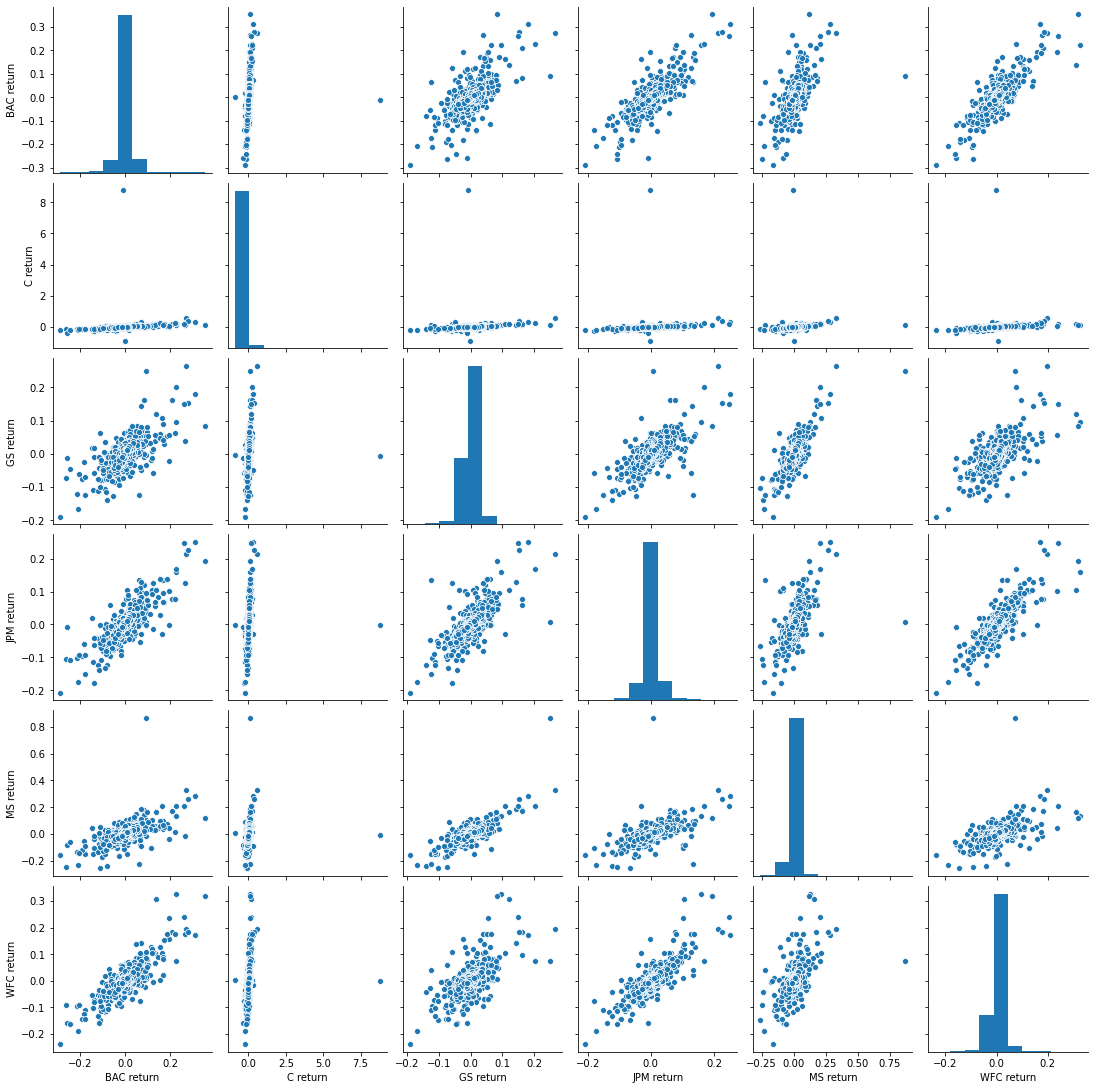

In [157]:
sns.pairplot(returns)

In [158]:
returns.idxmin()

BAC return   2009-01-20
C return     2011-05-06
GS return    2009-01-20
JPM return   2009-01-20
MS return    2008-10-09
WFC return   2009-01-20
dtype: datetime64[ns]

In [159]:
returns.idxmax()

BAC return   2009-04-09
C return     2011-05-09
GS return    2008-11-24
JPM return   2009-01-21
MS return    2008-10-13
WFC return   2008-07-16
dtype: datetime64[ns]

In [161]:
returns.std()

BAC return    0.036650
C return      0.179969
GS return     0.025346
JPM return    0.027656
MS return     0.037820
WFC return    0.030233
dtype: float64

In [175]:
#start=datetime.datetime(2015,1,1)
#end=datetime.datetime(2016,1,1)
#a=returns.reset_index()
#mask = (a['Date'] > start) & (a['Date'] <= end)
#a[mask].std()

returns.loc['2015-01-01':'2016-01-01'].std()


BAC return    0.016163
C return      0.015289
GS return     0.014046
JPM return    0.014017
MS return     0.016249
WFC return    0.012591
dtype: float64

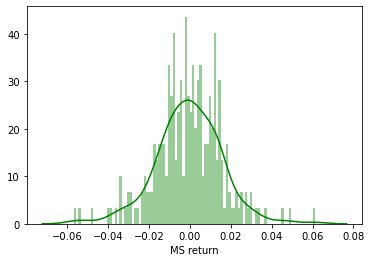

In [186]:
MS2015=returns.loc['2015-01-01':'2016-01-01']['MS return']
sns.distplot(MS2015,bins=100,color='green')

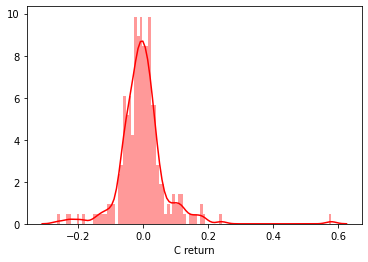

In [190]:
C2008=returns.loc['2008-01-01':'2009-01-01']['C return']
sns.distplot(C2008,bins=100,color='red')

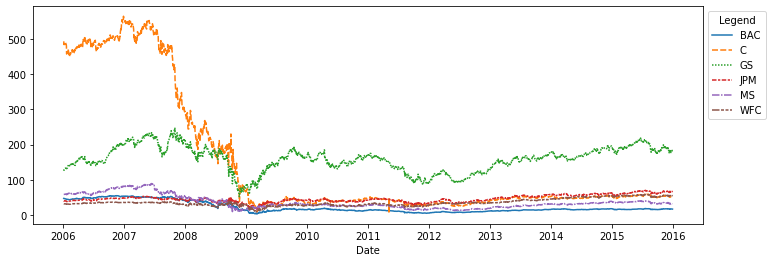

In [214]:
df1=df.xs(key='Close',axis=1,level='Stock Info')
plt.figure(figsize=(12,4))
sns.lineplot(data=df1)
plt.legend(title='Legend', bbox_to_anchor=(1.0, 1), loc='upper left')
#

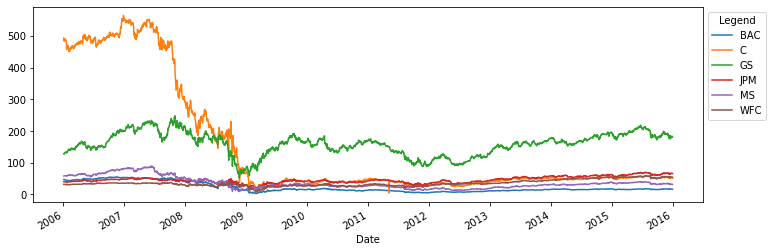

In [215]:
for t in tickers:
    df[t]['Close'].plot(label=t,figsize=(12,4))
plt.legend(title='Legend', bbox_to_anchor=(1.0, 1), loc='upper left')

In [217]:
df.xs(key='Close',axis=1,level='Stock Info').iplot()

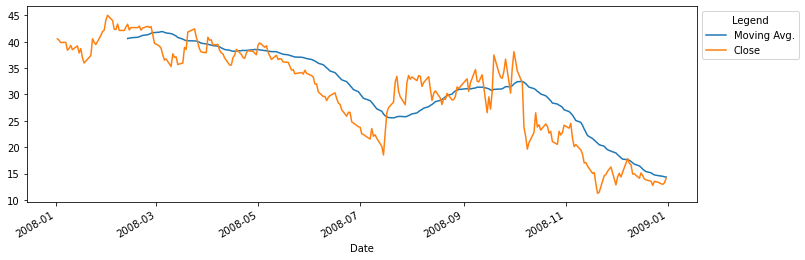

In [322]:
#df1=df1.drop('pandas_SMA_30',axis=1)
plt.figure(figsize=(12,4))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='Moving Avg.')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot()
plt.legend(title='Legend', bbox_to_anchor=(1.0, 1), loc='upper left')

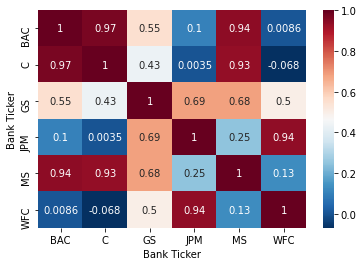

In [343]:
h=df.xs(key='Close',axis=1,level='Stock Info').corr()
sns.heatmap(h,cmap='RdBu_r',annot=True)

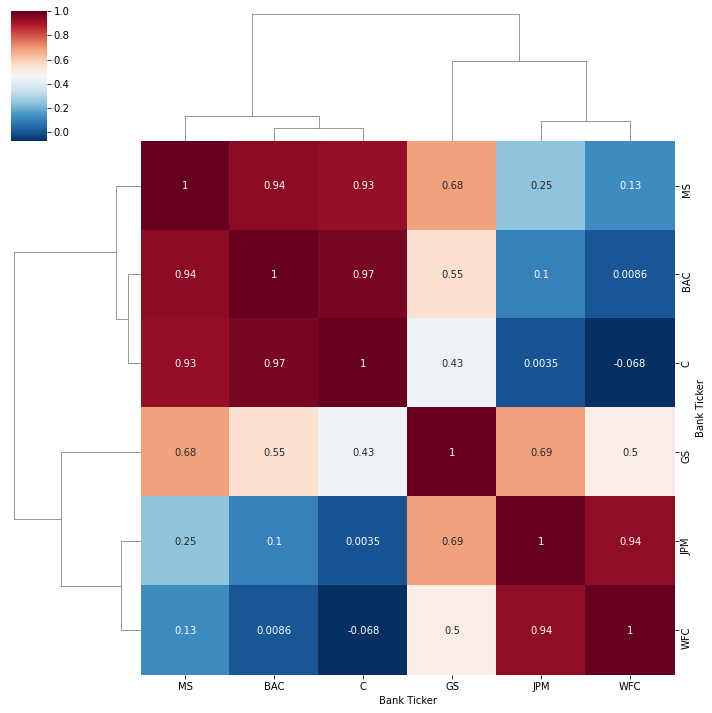

In [346]:
sns.clustermap(h,cmap='RdBu_r',annot=True)

In [349]:
h.iplot(kind='heatmap',colorscale='rdylbu')

In [337]:
BAC.loc['2015-01-01':'2016-01-01'].iplot(kind='candle')

In [353]:
MS['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='sma',periods=[13,21,55])

In [354]:
BAC['Close'].loc['2015-01-01':'2016-01-01'].ta_plot(study='boll')